In [1]:
#KNN classificaon
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass= read_csv('D:\\Data Science-Ayesha\\glass (1).csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
print(x.shape)

NameError: name 'x' is not defined

In [ ]:
print(y.shape)

(214,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaler.fit(glass.drop('Type', axis=1))

StandardScaler()

In [ ]:
import pandas as pd

In [ ]:
scaled_features= scaler.transform(glass.drop('Type', axis=1))
df= pd.DataFrame(scaled_features,columns = glass.columns[:-1])
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(scaled_features,glass['Type'],test_size= 0.30, random_state=42)

In [ ]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

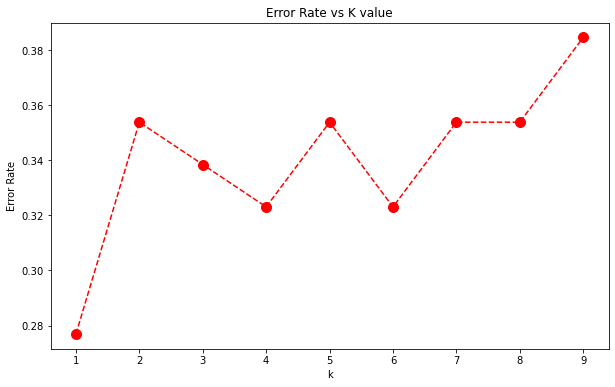

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor ='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [ ]:
#prediction and evaluaton
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
pred= knn.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
print(confusion_matrix(ytest,pred))
print('\n')
print (classification_report(ytest,pred))

[[16  2  1  0  0  0]
 [ 6 15  1  0  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



Zoo dataset
Implement a KNN model to classify the animals in to categorie

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as Knn

In [9]:
zoo= pd.read_csv('D:\\Data Science-Ayesha\\Zoo (1).csv')

In [10]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
zoo= zoo.iloc[:,1:]
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
xtrain,xtest= train_test_split(zoo,test_size=0.3,random_state=0)

In [17]:
#find best k value
acc=[]
for i in range(3,50,2):
    neigh=Knn(n_neighbors=i)
    neigh.fit(xtrain.iloc[:,0:16],xtrain.iloc[:,16])
    xtrain_acc = np.mean(neigh.predict(xtrain.iloc[:,0:16])==xtrain.iloc[:,16])
    xtest_acc= np.mean(neigh.predict(xtest.iloc[:,0:16])==xtest.iloc[:,16])
    acc.append([xtrain_acc,xtest_acc])

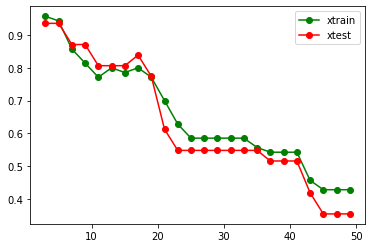

In [23]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'go-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['xtrain','xtest'])

In [34]:
#from above we can take at k=4 is as best model
#model building at k =4
neigh= Knn(n_neighbors= 4)
neigh.fit(xtrain.iloc[:,0:16],xtrain.iloc[:,16])
xtrain_acc=np.mean(neigh.predict(xtrain.iloc[:,0:16])==xtrain.iloc[:,16])
xtest_acc=np.mean(neigh.predict(xtest.iloc[:,0:16])==xtest.iloc[:,16])
xtrain_acc
xtest_acc

0.9354838709677419